#ABSTRACT

This notebook showcases the implementation of a Convolutional Neural Network (CNN) using TensorFlow and Keras for image classification. The dataset, termed "TMNIST_Data.csv" available on Kaggle, consists of images containing handwritten digits or characters. It aims to demonstrate the effectiveness and ease of using TensorFlow for image classification tasks. The model is trained to categorize images into distinct groups based on the provided labels.

#Dataset Overview:

The "TMNIST_Data.csv" dataset comprises the following structure:

Font Name: This categorical feature denotes the font style used to render the digit images. It may aid in analyzing model performance across various font styles or for models requiring font style identification or conditioning.

Label: This column contains labels indicating the actual digits represented by the images. Ranging from 0 to 9, these labels serve as the target variable for classification tasks.

The objective of a classification model is to accurately predict these labels based on the image data.

Image Data: The remaining 784 columns, from the third column onwards, encompass the grayscale pixel values of each 28x28 pixel image. These values, ranging from 0 (representing black) to 255 (representing white), form the feature set utilized for training the model.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

2024-04-10 02:03:09.852816: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 02:03:09.852942: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 02:03:10.004776: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
#Reading CSV file
data = pd.read_csv('/kaggle/input/tmnist-typeface-mnist/TMNIST_Data.csv')
print(data.head())

                        names  labels  1  2  3  4  5  6  7  8  ...  775  776  \
0          GrandHotel-Regular       2  0  0  0  0  0  0  0  0  ...    0    0   
1  EncodeSansCondensed-Medium       8  0  0  0  0  0  0  0  0  ...    0    0   
2              Varela-Regular       4  0  0  0  0  0  0  0  0  ...    0    0   
3              ArefRuqaa-Bold       3  0  0  0  0  0  0  0  0  ...    0    0   
4           KulimPark-Regular       1  0  0  0  0  0  0  0  0  ...    0    0   

   777  778  779  780  781  782  783  784  
0    0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0    0  
3    0    0    0    0    0    0    0    0  
4    0    0    0    0    0    0    0    0  

[5 rows x 786 columns]


#Preprocessing

The dataset is split into features (X) and labels (y).
Pixel values of the features (images) are normalized to be between 0 and 1.

Features are reshaped to fit the input shape expected by the CNN model.

Labels are converted to one-hot encoding.

The dataset is further split into training and test sets.

A CNN model is defined using TensorFlow's Sequential API.
The model architecture consists of convolutional layers followed by max-pooling layers for feature extraction, followed by flattening and dense layers for classification.

The output layer has a softmax activation function for multi-class classification, assuming 10 output classes.

In [ ]:
# Split the dataset into features (X) and labels (y)
X = data.drop(columns=['labels']).values
y = data['labels'].values

# Normalize pixel values to be between 0 and 1
X = X / 255.0

# Reshape the features for the CNN input
X = X.reshape((-1, 28, 28, 1))

# Convert labels to one-hot encoding
y = to_categorical(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Assuming 10 classes
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


#Model Compilation

optimizer='adam': Adam optimizer is chosen for optimization, which is a popular choice for training deep neural networks due to its adaptive learning rate properties.

loss='categorical_crossentropy': Categorical cross-entropy is used as the loss function, which is suitable for multi-class classification problems with one-hot encoded labels.

metrics=['accuracy']: During training, accuracy is monitored as an evaluation metric to measure the performance of the model on the training and validation datasets.

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8520 - loss: 0.4877 - val_accuracy: 0.9795 - val_loss: 0.0862
Epoch 2/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9806 - loss: 0.0619 - val_accuracy: 0.9845 - val_loss: 0.0689
Epoch 3/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.9879 - loss: 0.0403 - val_accuracy: 0.9829 - val_loss: 0.0624
Epoch 4/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9934 - loss: 0.0229 - val_accuracy: 0.9841 - val_loss: 0.0581
Epoch 5/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9942 - loss: 0.0204 - val_accuracy: 0.9887 - val_loss: 0.0426
Epoch 6/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9966 - loss: 0.0112 - val_accuracy: 0.9866 - val_loss: 0.0525
Epoch 7/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9962 - loss: 0.0119 - val_accuracy: 0.9887 - val_loss: 0.0415
Epoch 8/10
673/673 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9979 - loss: 0.0073 - 

#Model Training

The model is trained using the fit method. This process involves iterating over the training data for a fixed number of epochs while updating the model parameters to minimize the specified loss function.

X_train and y_train are the training features and labels, respectively.

epochs=10: The number of epochs defines how many times the entire training dataset will be passed forward and backward through the neural network for training.

validation_split=0.1: This parameter specifies that 10% of the training data will be used as validation data to evaluate the model's performance after each epoch.
The validation data is used to monitor for overfitting and to tune hyperparameters.

In [ ]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")
print(f"Test accuracy: {test_acc * 100:.2f}%")

187/187 - 1s - 5ms/step - accuracy: 0.9920 - loss: 0.0369
Test accuracy: 0.9919732213020325, Test loss: 0.03688869997859001
Test accuracy: 99.20%


#Testing the Model

The evaluate method computes the loss and accuracy of the model on the provided test data (X_test and y_test).

The verbose=2 parameter controls the verbosity of the evaluation process. Setting it to 2 displays a progress bar during evaluation.

The printed output provides the test accuracy and test loss obtained from the evaluation.
In the given output, 187/187 indicates that the evaluation was performed on 187 batches of data.

1s indicates that the evaluation took approximately 1 second to complete.

5ms/step indicates the time taken per step (per batch) during evaluation.

accuracy: 0.9920 indicates the accuracy achieved by the model on the test data, which is approximately 99.20%.

loss: 0.0369 indicates the loss value obtained during evaluation, which is approximately 0.0369.

# Model Visualization

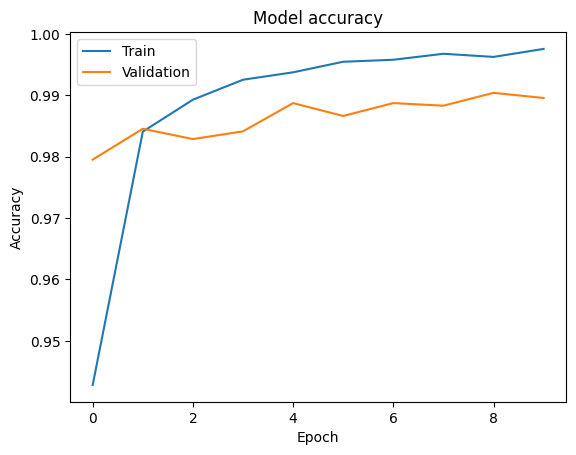

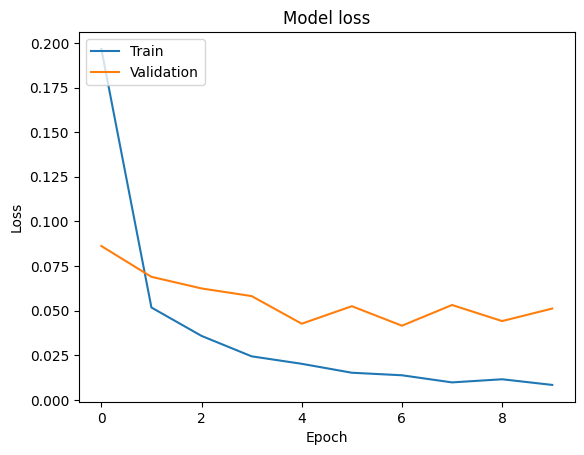

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

##Graph 1 Interpretation:

Training Accuracy (Blue Line): Indicates high performance on the training dataset, with accuracy improving slightly over 9 epochs.

Validation Accuracy (Orange Line): Also high, showing good generalization but plateaus early, suggesting the model’s learning is stabilizing.

Axis Labels:

X-axis: Epochs 0 to 8.
Y-axis: Accuracy from 95% to 100%.
Overall Interpretation: The model is high-performing and doesn't show significant overfitting. The training and validation accuracy are close, implying consistent learning.

##Graph 2 Interpretation:

Training Loss (Blue Line): This shows a significant drop initially, which levels off as the epochs increase, indicating that the model is learning and improving its predictions on the training data.

Validation Loss (Orange Line): Begins high but decreases quickly, albeit less smoothly than the training loss, suggesting the model is generalizing well but with some fluctuations in learning from the validation data.

Axis Labels:

X-axis: Epochs from 0 to 8.

Y-axis: Loss ranging from 0 to 0.2.

Overall Interpretation: The model is effectively reducing loss over time, showing learning and improvement in performance on unseen data without large discrepancies that would suggest overfitting.

##Visualizing Training Data

Function Details:

Name: visualize_image_grid

Parameters:
images: a 4D NumPy array where each image is expected to be in its own separate array within this larger array.
rows: the number of rows to display in the grid.
cols: the number of columns to display in the grid.
figsize: the size of the figure to display (width, height in inches).

Process:
It uses Matplotlib to create a grid of subplots with the specified number of rows and columns.
It iterates over the provided images, displaying each one in a subplot.
If the number of images is less than the number of subplots, the remaining subplots are left blank.
The imshow function is used with the color map Blues, which means the images are displayed using shades of blue.

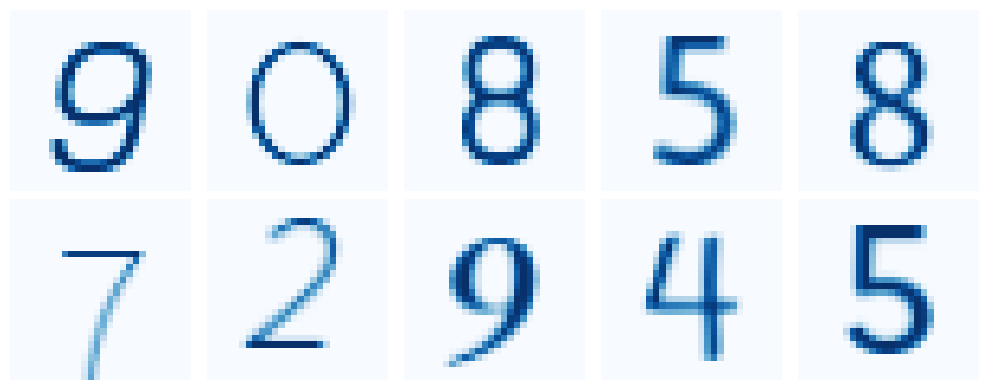

In [ ]:
import matplotlib.pyplot as plt

# Function to visualize a grid of images
def visualize_image_grid(images, rows=2, cols=5, figsize=(10, 4)):
    """
    Visualizes a grid of images.

    Parameters:
        images (numpy.ndarray): The images to display, expects a 4D array.
        rows (int): Number of rows in the image grid.
        cols (int): Number of columns in the image grid.
        figsize (tuple): Size of the figure.
    """
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i].squeeze(), cmap='Blues')
            ax.axis("off")
        else:
            ax.axis("off")
    plt.tight_layout()
    plt.show()

# Example usage with the first 10 images in the training set
visualize_image_grid(X_train[:10], rows=2, cols=5)

OUTPUT:

The output displays a grid of 10 images. Each image is a pixelated number, ranging from 0 to 9. These are typical of the MNIST dataset of handwritten digits, which is often used for training and testing in the field of machine learning. The color map applied gives the images a blue tone, and the figure size seems to be set to ensure the images are displayed in a wide format.

This kind of visualization is helpful for quickly assessing the quality and variety of image data before processing it further with machine learning algorithms.

#Feature Maps

Feature maps are the outputs of the filter operations in a convolutional layer of a CNN; they represent the features that the network detects at that specific layer, such as edges, textures, or patterns within the image.

The code defines a function to visualize the feature maps of specified layers in a convolutional neural network (CNN) for a given image.

It does this by creating a simplified model that outputs only the desired layers' activations. Then, for each layer, it normalizes the feature maps and displays a set number of them in a grid using Matplotlib.

The visualization helps understand what features each layer is extracting from the image. An example call to the function is provided at the end, using a pre-trained model and a sample image from a dataset (X_train[0]).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


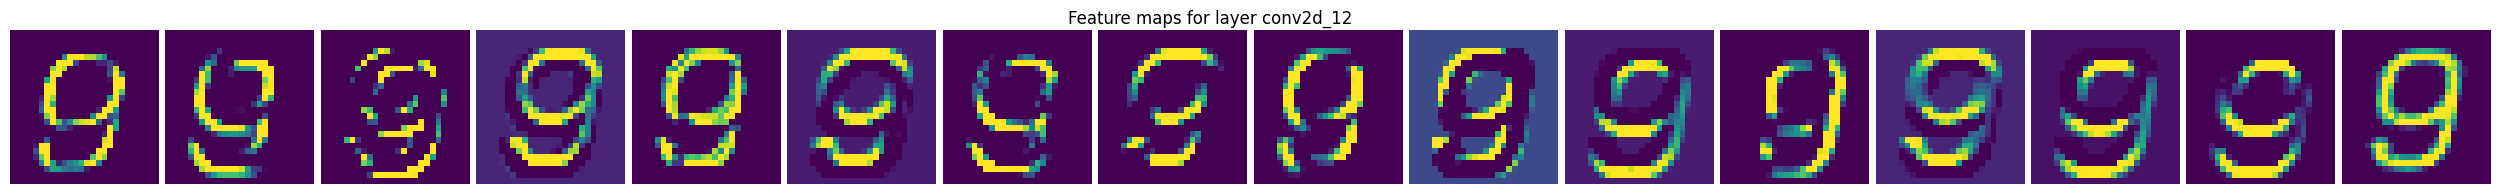

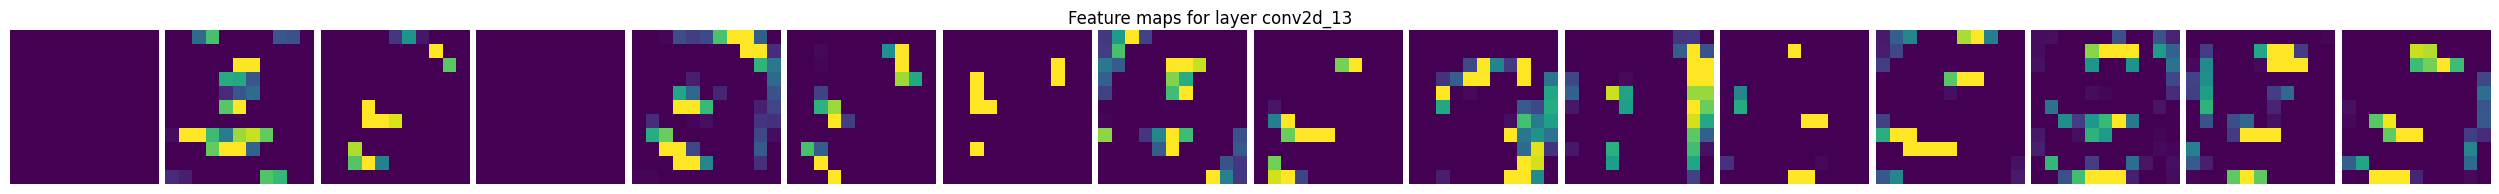

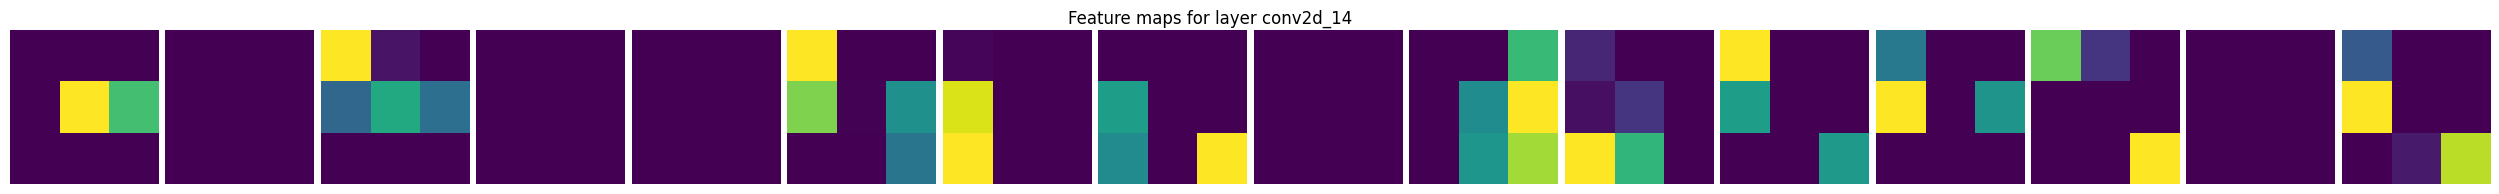

In [ ]:
def visualize_feature_maps(model, image, layer_names, features_per_layer=16):
    """Visualize the feature maps for specific layers of a CNN given an image input."""
    outputs = [model.get_layer(name).output for name in layer_names]
    model_short = tf.keras.models.Model(inputs=model.inputs, outputs=outputs)
    feature_maps = model_short.predict(np.array([image]))

    for layer_name, feature_map in zip(layer_names, feature_maps):
        n_features = feature_map.shape[-1]  # Number of features in the feature map
        size = feature_map.shape[1]  # The feature map has shape (1, size, size, n_features)

        # We display the selected number of features per layer
        feature_map = feature_map[..., :features_per_layer]
        n_features = features_per_layer

        # Create a grid of subplots
        fig, axes = plt.subplots(nrows=1, ncols=n_features, figsize=(n_features * 2, 2))

        for i in range(n_features):
            ax = axes[i]
            # Postprocess the feature to make it visually palatable
            feature_image = feature_map[0, :, :, i]
            feature_image -= feature_image.mean()
            feature_image /= feature_image.std() + 1e-5
            feature_image *= 64
            feature_image += 128
            feature_image = np.clip(feature_image, 0, 255).astype('uint8')

            ax.imshow(feature_image, aspect='auto', cmap='viridis')
            ax.axis('off')
        plt.subplots_adjust(wspace=0.05, hspace=0.05)
        plt.suptitle(f'Feature maps for layer {layer_name}')
        plt.show()

# Correct the layer names based on your model's layers
correct_conv_layers = ['conv2d_12', 'conv2d_13', 'conv2d_14']
# Visualize the first 16 feature maps for each layer
visualize_feature_maps(model, X_train[0], correct_conv_layers, features_per_layer=16)

 The image shows visualizations of feature maps from three different convolutional layers of a CNN. These maps highlight what the network is focusing on after processing an input image, probably of a handwritten digit '9'.

Top Row (conv2d_12): The feature maps retain a fair amount of the original structure of the digit. Different aspects of the '9' are highlighted, indicating that this early layer might be detecting edges and curves.

Middle Row (conv2d_13): The representations are more abstract. You can see less of the digit's structure, and more emphasis on specific regions, suggesting this layer might be extracting more complex features like corners and junctions.

Bottom Row (conv2d_14): The feature maps are highly abstract. The structure of '9' is no longer discernible. This deeper layer captures high-level concepts which might be related to the overall shape and the presence of specific patterns.

The progression from the top to the bottom rows illustrates how features become more abstract as you go deeper into the CNN, moving from simple edges and textures to complex patterns that represent higher-level concepts.

This visualization helps understand the type of patterns or features learned by the CNN at different layers of the network. Each feature map represents a different aspect of the input image that the CNN has learned to recognize and extract as part of its training process.


#CONCLUSION

The visualization of the feature maps across different layers of the convolutional neural network provides insightful evidence on how CNNs process visual information. Initially, lower layers, like conv2d_12, focus on simple, recognizable features such as edges and shapes, preserving much of the original form of the digit. As we move to intermediate layers like conv2d_13, the network abstracts these features into more complex patterns, moving away from the direct visual cues of the input. Finally, in the deeper layers, such as conv2d_14, the feature maps represent high-level features that are not visually similar to the original input but are critical for the network to make classifications or predictions. This progression from tangible to abstract representations exemplifies the hierarchical nature of feature extraction in CNNs, which allows for the effective handling of complex visual recognition tasks.